## Module_2:

## Team Members:
Max Calcoen, Jack O'Hearn

## Project Title: TBD
idea: how do blood vessel summary statistics differ across left and superior lobes?

## Project Goal: TBD
idea: this project seeks to find out how the blood vessels of left and superior lobes differ

## Disease Background: 
*Fill in information and please note that this module is truncated and only has 5 bullets (instead of the 11 that you did for Module #1).*

* Prevalence & incidence ([source](https://pmc.ncbi.nlm.nih.gov/articles/PMC6313500/))
    - north america / europe: ~2.8 to 9.3 per 100,000 person-years (varies by definition)
    - usa, narrow definition: ~6.8 per 100,000; broader: up to ~16.3–17.4 per 100,000
    - prevalence in u.s. estimated ~10 to 60 cases / 100,000 (rare disease threshold)
* Risk factors (genetic, lifestyle) ([source](https://pmc.ncbi.nlm.nih.gov/articles/PMC6777743/))
    - older age / aging (disease primarily presents in middle to older adults)
    - male sex bias
    - cigarette smoking / smoking history (strongest environmental risk)
    - genetic predispositions: mutations in telomerase genes, surfactant genes, shorter telomeres, MUC5B promoter variant (minor allele)
    - microbiome / microbial burden in lung (higher bacterial load in BAL, certain genera like Streptococcus, Staphylococcus)
    - comorbidities / cofactors: gastroesophageal reflux disease (GERD), environmental exposures (metal dusts, silica, wood dust), viral injury, lung injury agents
* Symptoms ([source](https://www.ncbi.nlm.nih.gov/books/NBK448162/))
    - gradual onset progressive (shortness of breath) on exertion
    - dry nonproductive chronic cough
    -  bibasilar “velcro” crackles on auscultation (fine inspiratory crackles)
    - reduced exercise tolerance, fatigue, weight loss (constitutional)
    - pulmonary function test: restrictive pattern, decreased forced vital capacity (FVC), decreased DLCO (diffusing capacity)
* Standard of care treatment(s) ([source](https://pmc.ncbi.nlm.nih.gov/articles/PMC6111543/))
    - antifibrotic therapy: Pirfenidone (slows decline in lung function, reduces fibrosis mediators)
    - antifibrotic therapy: Nintedanib (tyrosine kinase inhibitor, slows FVC decline)
    - supportive therapies: supplemental oxygen, pulmonary rehabilitation, symptom control (cough management)
    - management of comorbidities (GERD, pulmonary hypertension)
    - lung transplantation
    - clinical trials / emerging therapies (targeting profibrotic pathways, biomarkers)
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology) ([source](https://pmc.ncbi.nlm.nih.gov/articles/PMC2675823/))
    - impaired epithelial regeneration / aberrant repair, with persistent activation of epithelial cells and failed re-epithelialization
    - senescence, mitochondrial dysfunction, oxidative stress in epithelial cells leading to pro-fibrotic signaling
    - release of profibrotic mediators (TGF-β, connective tissue growth factor, PDGF, fibronectin, integrins) from injured epithelium & mesenchymal cells
    - recruitment, activation and differentiation of fibroblasts → myofibroblasts → excessive ECM (extracellular matrix) deposition (collagen, fibronectin, proteoglycans)
    - mechanical stress feedback: matrix stiffening, mechanotransduction, latent TGF-ß activation via contraction of myofibroblasts
    - cross talk with immune cells / inflammation: dysregulated wound healing, low grade chronic inflammation, altered macrophage / fibrocyte responses
    - epigenetic alterations, noncoding RNAs, altered gene expression networks in fibrotic lung cells

## Data-Set: 
*(Describe the data set(s) you will analyze. Cite the source(s) of the data. Describe how the data was collected -- What techniques were used? What units are the data measured in? Etc.)*
- The dataset is composed of Unpublished data collected by the Peirce-Cottler Lab (Dept. of Biomedical Engineering) and Kim Lab (Division of Pulmonary and Critical Care) at the University of Virginia School of Medicine.
- The dataset is composed of 78 black and white images (.jpg), collected at various depths of a fibrotic mouse lung.
- White in the images symbolizes fibrotic lesion, and black symbolizes healthy lung tissue.
- The images come from a Bleomycin-induced Lung Injury Model, where an antibiotic primarily used as chemotherapy (but also causes lung fibrosis) is administered to a mouse.
- 3 weeks later, the mice were harvested.
- The mouse lung tissue is then fixed, mounted, and sliced, then fluorescent microscopy was performed.
- The mouse lungs were immunostained for 3 proteins of interest:
   - desmin (myofibroblasts)
   - smooth muscle alpha actin (large blood vessel smooth muscle cells)
   - CD-31 (endothelial cells)

## Data Analyis: 
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

First, we pulled in each image as a cv2 image object. Then, we counted each white pixel in each image. We plotted this relationship, which revealed that higher image depths have a higher percentage of white pixels. Finally, we tried removing noise from the image using contour detection. First, we tried to simply filter out dots with small contours. Then, we tried to dilate each contour to see if it could help merge borders of larger blobs (vessels) with empty space inside. Finally, we combined the methods, first dilating the contours to join edges of broken blobs and then filtering out blobs with small contours.


Below is the analysis.

### data folder setup (for running code below)
```html
/data
    /imaging
        MASK_Sk658 Llobe ch010017.jpg
        ...here contains all the images
    depths.csv
    Filenames and Depths (old).csv
    pct_white_pixels.csv
```

couldn't find depth for file MASK_Sk658 Llobe ch010053.jpg


,filename,image,depth
0,MASK_SK658 Slobe ch010129.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3250
1,MASK_SK658 Slobe ch010115.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8800
2,MASK_SK658 Slobe ch010114.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9900
3,MASK_SK658 Slobe ch010060.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8400
4,MASK_SK658 Slobe ch010048.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",540


Counts of pixel by color in each image
White pixels in image 0: 82784
Black pixels in image 0: 4111520

White pixels in image 1: 151132
Black pixels in image 1: 4043172

White pixels in image 2: 242340
Black pixels in image 2: 3951964

White pixels in image 3: 142359
Black pixels in image 3: 4051945

White pixels in image 4: 49491
Black pixels in image 4: 4144813

White pixels in image 5: 369855
Black pixels in image 5: 3824449

White pixels in image 6: 56003
Black pixels in image 6: 4138301

White pixels in image 7: 193743
Black pixels in image 7: 4000561

White pixels in image 8: 99131
Black pixels in image 8: 4095173

White pixels in image 9: 120910
Black pixels in image 9: 4073394

White pixels in image 10: 139549
Black pixels in image 10: 4054755

White pixels in image 11: 383479
Black pixels in image 11: 3810825

White pixels in image 12: 119938
Black pixels in image 12: 4074366

White pixels in image 13: 100236
Black pixels in image 13: 4094068

White pixels in image 14: 97032
B

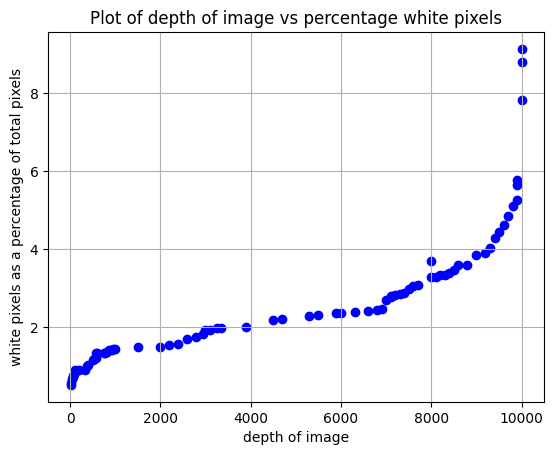

In [8]:
"""FILE: get_pct_white.ipynb"""

# %%
import pandas as pd
import numpy as np
import cv2
import os
from termcolor import colored
import matplotlib.pyplot as plt

images = pd.DataFrame()

data_path = r"data"
imaging_path = r"imaging"
filenames = os.listdir(os.path.join(data_path, imaging_path))
depths = pd.read_csv(os.path.join(data_path, "depths.csv"))

for i in filenames:
    img = cv2.imread(os.path.join(data_path, imaging_path, i), 0)
    try:
        depth = depths[depths["Filenames"].str.lower() == i.lower()][
            "Depth from lung surface (in micrometers) where image was acquired"
        ].values[0]
        # some files are named with SK658 and some with Sk658
    except IndexError:
        print(f"couldn't find depth for file {i}")
        continue
    images = pd.concat(
        [images, pd.DataFrame([{"filename": i, "image": img, "depth": depth}])],
        ignore_index=True,
    )
display(images.head())

# %%
white_counts = []
black_counts = []
white_percents = []


for x in range(len(images)):
    _, binary = cv2.threshold(images.iloc[x]["image"], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(images)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filename

for x in range(len(images)):
    white_percent = 100 * (white_counts[x] / (black_counts[x] + white_counts[x]))
    white_percents.append(white_percent)

# print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(images)):
    print(colored(f"{images.iloc[x]['filename']}:", "red"))
    print(f"{white_percents[x]}% White | Depth: {images.iloc[x]['depth']} microns")
    print()

# %%
"""Write your data to a .csv file"""

# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame(
    {"filename": images["filename"], "depth": images["depth"], "white_percent": white_percents}
)

# Write that DataFrame to a .csv file

df.to_csv(os.path.join(data_path, "pct_white_pixels.csv"), index=False)

# %%
# display graph
plt.scatter(images["depth"], white_percents, marker="o", linestyle="-", color="blue")
plt.title("Plot of depth of image vs percentage white pixels")
plt.xlabel("depth of image")
plt.ylabel("white pixels as a percentage of total pixels")
plt.grid(True)

couldn't find depth for file MASK_Sk658 Llobe ch010053.jpg
(78, 3)
0     MASK_SK658 Slobe ch010129.jpg
1     MASK_SK658 Slobe ch010115.jpg
2     MASK_SK658 Slobe ch010114.jpg
3     MASK_SK658 Slobe ch010060.jpg
4     MASK_SK658 Slobe ch010048.jpg
                  ...              
73    MASK_SK658 Slobe ch010118.jpg
74    MASK_SK658 Slobe ch010130.jpg
75    MASK_SK658 Slobe ch010078.jpg
76    MASK_SK658 Slobe ch010087.jpg
77    MASK_SK658 Slobe ch010093.jpg
Name: filename, Length: 78, dtype: object


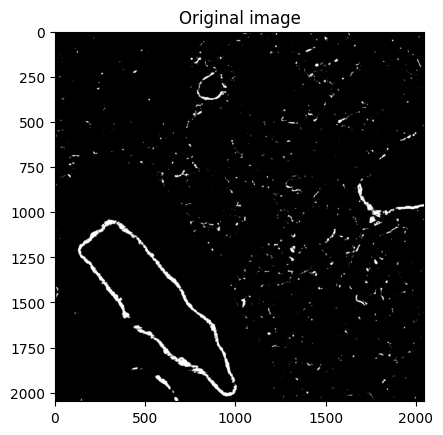

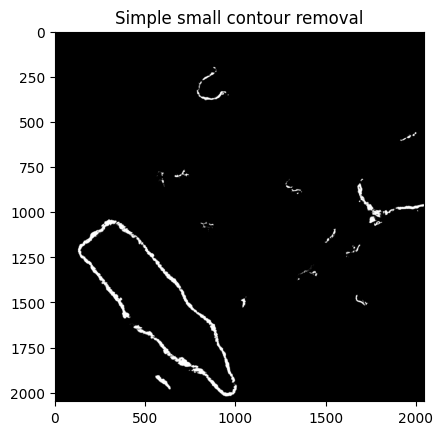

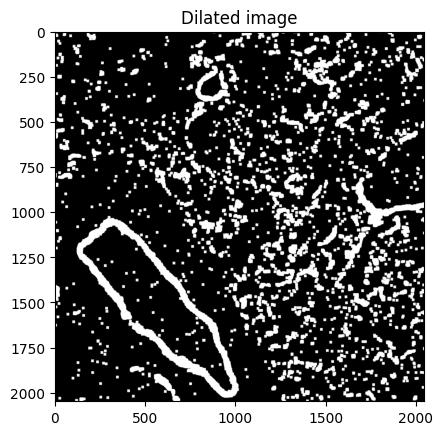

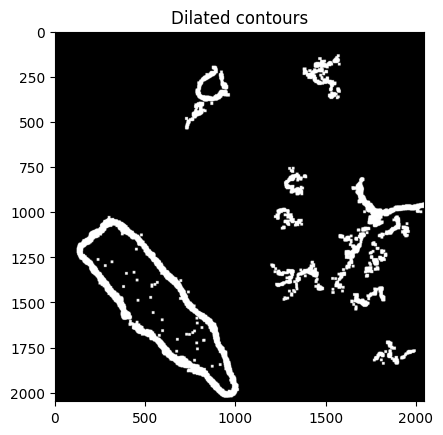

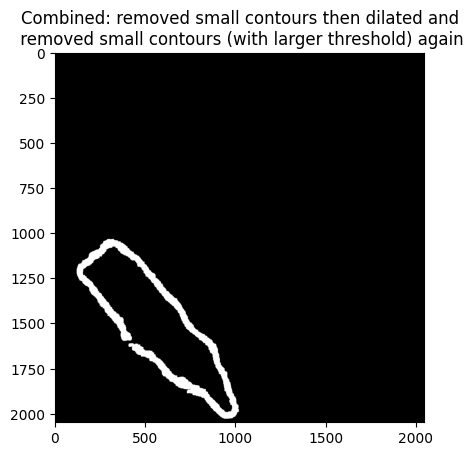

In [17]:
"""FILE: contour_detection.ipynb"""
# %%
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

images = pd.DataFrame()

data_path = r"data"
imaging_path = r"imaging"
filenames = os.listdir(os.path.join(data_path, imaging_path))
depths = pd.read_csv(os.path.join(data_path, "depths.csv"))

# display(filenames)
for i in filenames:
    img = cv2.imread(os.path.join(data_path, imaging_path, i), 0)
    try:
        depth = depths[depths["Filenames"].str.lower() == i.lower()][
            "Depth from lung surface (in micrometers) where image was acquired"
        ].values[0]
        # some files are named with SK658 and some with Sk658
    except IndexError:
        print(f"couldn't find depth for file {i}")
        continue
    images = pd.concat(
        [images, pd.DataFrame([{"filename": i, "image": img, "depth": depth}])],
        ignore_index=True,
    )

print(images.shape)

# %%
print(images["filename"])

# %%
img = (
    images[images["filename"] == "MASK_Sk658 Llobe ch010034.jpg"]["image"]
    .values[0]
    .copy()
)

# convert to rgb instead of grayscale
plt.imshow(img, cmap="gray")
plt.title("Original image")
plt.show()

# %%
# remove small contours

img_contour_simple = img.copy()

contours, _ = cv2.findContours(
    img_contour_simple, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

for cntr in contours:
    if cv2.contourArea(cntr) > 1000:
        continue
    convHull = cv2.convexHull(cntr)
    cv2.drawContours(
        img_contour_simple, [convHull], -1, (0, 0, 0), thickness=cv2.FILLED
    )
img_contour_simple = cv2.cvtColor(img_contour_simple, cv2.COLOR_GRAY2RGB)
plt.imshow(img_contour_simple)
plt.title("Simple small contour removal")
plt.show()

# %%
img_dilate = img.copy()
img_dilate = cv2.dilate(img_dilate, np.ones((15, 15), np.uint8), iterations=1)

plt.imshow(img_dilate, cmap="gray")
plt.title("Dilated image")
plt.show()

# %%
# look at contours on dilated image
img_dilated_contour = img_dilate.copy()
contours, _ = cv2.findContours(
    img_dilated_contour, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

for cntr in contours:
    if cv2.contourArea(cntr) > 10000:
        continue
    convHull = cv2.convexHull(cntr)
    cv2.drawContours(
        img_dilated_contour, [convHull], -1, (0, 0, 0), thickness=cv2.FILLED
    )
img_dilated_contour = cv2.cvtColor(img_dilated_contour, cv2.COLOR_GRAY2RGB)
plt.imshow(img_dilated_contour)
plt.title("Dilated contours")
plt.show()

# %%
# combine
img_combine = img_contour_simple.copy()
img_combine = cv2.dilate(img_combine, np.ones((15, 15), np.uint8), iterations=1)
# Convert to grayscale before thresholding
img_combine_gray = cv2.cvtColor(img_combine, cv2.COLOR_RGB2GRAY)
_, img_combine_thresh = cv2.threshold(img_combine_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
contours, _ = cv2.findContours(img_combine_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cntr in contours:
    if cv2.contourArea(cntr) > 50000:
        continue
    convHull = cv2.convexHull(cntr)
    cv2.drawContours(img_combine_thresh, [convHull], -1, (0, 0, 0), thickness=cv2.FILLED)
img_combine = cv2.cvtColor(img_combine_thresh, cv2.COLOR_GRAY2RGB)
plt.imshow(img_combine)
plt.title("Combined: removed small contours then dilated and\n removed small contours (with larger threshold) again")
plt.show()

## Verify and validate your analysis: 
*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

none.

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*

none.